# Geographic Data Exploration

In [1]:
# Import libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import snowflake.connector
from skimage import io

In [2]:
# Read in Snowflake credentials
with open('credentials.txt', 'r') as f:
    creds = f.readlines()
    USER = creds[0].strip()
    PASSWORD = creds[1].strip()
    ACCOUNT = creds[2].strip()

In [3]:
# Open a connection and test that it works
con = snowflake.connector.connect(
    user=USER,
    password=PASSWORD,
    account=ACCOUNT,
)
cs = con.cursor()
cs.execute("SELECT current_version()")
one_row = cs.fetchone()
print(one_row[0])

7.31.1


### Shapes Data

In [4]:
# Import data as a Pandas Dataframe and preview
cs.execute("SELECT * FROM DEV.JUSTIN.SHAPES")
shape_data = cs.fetch_pandas_all()
shape_data

,shape_id,shape_distance_traveled,shape_latitude,shape_longitude,shape_sequence
0,546042,3355.3,45.544365,-122.936581,56
1,546042,3430.8,45.544181,-122.936716,57
2,546042,3495.0,45.544022,-122.936824,58
3,546042,3546.6,45.543892,-122.936903,59
4,546042,3644.5,45.543640,-122.937035,60
...,...,...,...,...,...
627466,543823,581.8,45.521378,-122.989795,22
627467,543823,613.6,45.521377,-122.989671,23
627468,543823,661.5,45.521377,-122.989484,24
627469,543823,723.6,45.521379,-122.989242,25


In [5]:
# Determine number of unique shapes
unique_shapes = shape_data['shape_id'].unique()
len(unique_shapes)

923

In [6]:
# Filter down to an arbitrary shape
arbitrary_shape_data = shape_data.loc[shape_data['shape_id'] == unique_shapes[0]]
arbitrary_shape_data

,shape_id,shape_distance_traveled,shape_latitude,shape_longitude,shape_sequence
0,546042,3355.3,45.544365,-122.936581,56
1,546042,3430.8,45.544181,-122.936716,57
2,546042,3495.0,45.544022,-122.936824,58
3,546042,3546.6,45.543892,-122.936903,59
4,546042,3644.5,45.543640,-122.937035,60
...,...,...,...,...,...
269995,546042,3043.1,45.545048,-122.935851,51
269996,546042,3096.1,45.544941,-122.935991,52
269997,546042,3142.7,45.544845,-122.936111,53
269998,546042,3264.7,45.544576,-122.936394,54


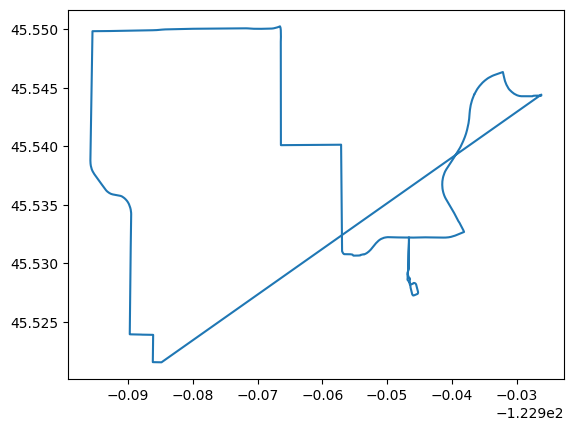

In [7]:
# Draw the shape
plt.plot(arbitrary_shape_data['shape_longitude'], arbitrary_shape_data['shape_latitude'])

#### Thoughts on Shapes

* **Mapping to Objects** Looking at the other GTFS tables, these shape ID's correspond to "Trips". Trips in turn have a many-to-one relationship with routes. Not sure what to do with that yet, but it's a start.

### Stops Data

In [8]:
# Import data as a Pandas Dataframe and preview
cs.execute("SELECT * FROM DEV.JUSTIN.STOPS")
stops_data = cs.fetch_pandas_all()
stops_data

,stop_id,stop_latitude,stop_longitude,stop_name
0,2,45.420609,-122.675671,A Ave & Chandler
1,3,45.419388,-122.665197,A Ave & Second St
2,4,45.420703,-122.675152,A Ave & 10th St
3,6,45.420217,-122.673070,A Ave & 8th St
4,7,45.420411,-122.672680,A Ave & 8th St
...,...,...,...,...
6537,landmark-2563,45.430084,-122.769663,Tigard TC WES Station
6538,landmark-107,45.521301,-122.978373,Tuality Hospital/SE 8th Ave MAX Station
6539,landmark-113,45.510657,-122.716792,Washington Park MAX Station
6540,landmark-106,45.521166,-122.969510,Washington/SE 12th Ave MAX Station


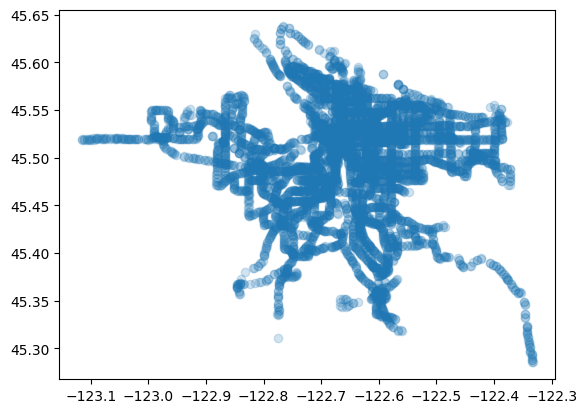

In [9]:
# Try plotting the stops
plt.scatter(stops_data['stop_longitude'], stops_data['stop_latitude'], alpha=0.2)

#### Thoughts on Stops

* **ID Values** Most of these stops have numeric identifiers. A handful have "landmark-xxx" identifiers though.

* **Redundant Stop Names** Some of these stops have the same name, but are located in a slightly different location.

### Current Vehicle Locations

In [10]:
# Import data as a Pandas Dataframe and preview
cs.execute("SELECT * FROM DEV.JUSTIN.CURRENT_VEHICLE_LOCATIONS")
vehicle_data = cs.fetch_pandas_all()
vehicle_data

,vehicle_id,vehicle_latitude,vehicle_longitude,vehicle_timestamp,vehicle_type,vehicle_subtype
0,101,45.599802,-122.684568,1694033575087,rail,Light Rail
1,109,45.508073,-122.681930,1694033551622,rail,Light Rail
2,110,45.501818,-122.418515,1694033575035,rail,Light Rail
3,111,45.431208,-122.635112,1694033575102,rail,Light Rail
4,112,45.524114,-122.564449,1694033572818,rail,Light Rail
...,...,...,...,...,...,...
420,4511,45.528064,-122.675954,1694033571421,bus,BRT
421,4512,45.506548,-122.662033,1694033574501,bus,BRT
422,4514,45.502831,-122.670953,1694033574502,bus,BRT
423,4515,45.504558,-122.496697,1694033565719,bus,BRT


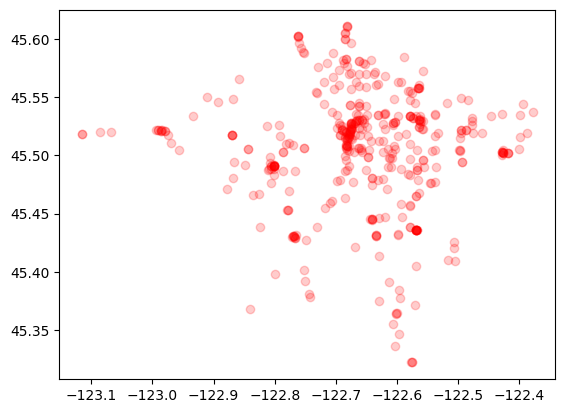

In [11]:
# Try plotting the vehicles
plt.scatter(vehicle_data['vehicle_longitude'], vehicle_data['vehicle_latitude'], alpha=0.2, color='red')

<Axes: xlabel='vehicle_longitude', ylabel='vehicle_latitude'>

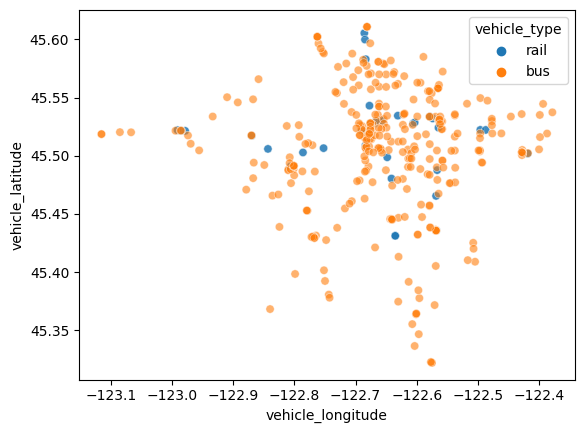

In [12]:
# Try plotting the vehicles by type
sns.scatterplot(x='vehicle_longitude', y='vehicle_latitude', data=vehicle_data, alpha=0.6, hue=vehicle_data['vehicle_type'])

<Axes: xlabel='vehicle_longitude', ylabel='vehicle_latitude'>

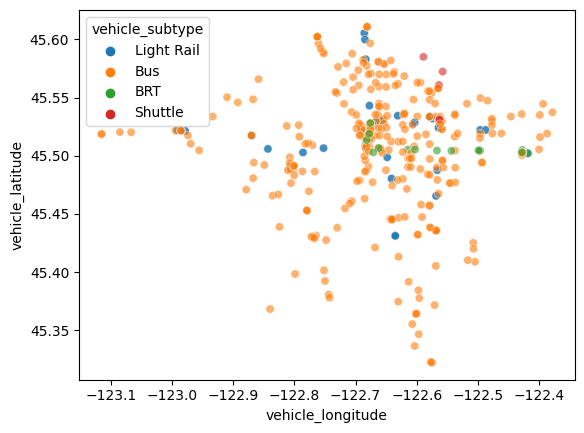

In [13]:
# Try plotting the vehicles by subtype
sns.scatterplot(x='vehicle_longitude', y='vehicle_latitude', data=vehicle_data, alpha=0.6, hue=vehicle_data['vehicle_subtype'])

---

### Shapes Revisted

I did some barebones data reworking to map the route data to shapes. 

In [14]:
# Import data as a Pandas Dataframe and preview
cs.execute("SELECT * FROM DEV.JUSTIN.ROUTE_SHAPES")
route_shape_data = cs.fetch_pandas_all()
route_shape_data

,shape_id,shape_distance_traveled,shape_latitude,shape_longitude,shape_sequence,route_id,route_color,route_name,route_type
0,545842,0.0,45.522879,-122.677388,1,1,084C8D,Vermont,3
1,545842,12.6,45.522913,-122.677396,2,1,084C8D,Vermont,3
2,545842,41.3,45.522988,-122.677431,3,1,084C8D,Vermont,3
3,545842,283.6,45.523003,-122.676486,4,1,084C8D,Vermont,3
4,545842,289.5,45.523002,-122.676463,5,1,084C8D,Vermont,3
...,...,...,...,...,...,...,...,...,...
314476,543818,97972.9,45.321243,-122.576245,1337,99,084C8D,Macadam/McLoughlin,3
314477,543818,98019.8,45.321165,-122.576100,1338,99,084C8D,Macadam/McLoughlin,3
314478,543818,98069.3,45.321275,-122.575987,1339,99,084C8D,Macadam/McLoughlin,3
314479,543818,98114.7,45.321398,-122.575960,1340,99,084C8D,Macadam/McLoughlin,3


In [17]:
# Determine number of unique shapes
unique_routes = route_shape_data['shape_id'].unique()
len(unique_routes)

468

In [18]:
# Filter down to an arbitrary route
arbitrary_route_data = route_shape_data.loc[route_shape_data['shape_id'] == unique_routes[0]]
arbitrary_route_data

,shape_id,shape_distance_traveled,shape_latitude,shape_longitude,shape_sequence,route_id,route_color,route_name,route_type
0,545842,0.0,45.522879,-122.677388,1,1,084C8D,Vermont,3
1,545842,12.6,45.522913,-122.677396,2,1,084C8D,Vermont,3
2,545842,41.3,45.522988,-122.677431,3,1,084C8D,Vermont,3
3,545842,283.6,45.523003,-122.676486,4,1,084C8D,Vermont,3
4,545842,289.5,45.523002,-122.676463,5,1,084C8D,Vermont,3
...,...,...,...,...,...,...,...,...,...
763,545842,62463.5,45.476185,-122.720849,764,1,084C8D,Vermont,3
764,545842,62489.1,45.476217,-122.720760,765,1,084C8D,Vermont,3
765,545842,62506.8,45.476217,-122.720691,766,1,084C8D,Vermont,3
766,545842,62606.6,45.476214,-122.720302,767,1,084C8D,Vermont,3


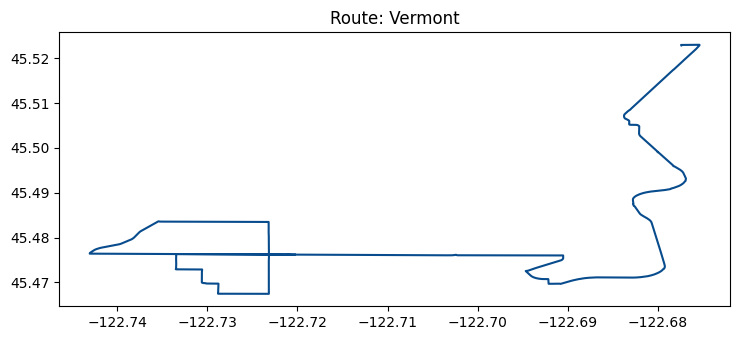

In [32]:
# Draw the route
plot = plt.plot(arbitrary_route_data['shape_longitude'], arbitrary_route_data['shape_latitude'], color=f'#{arbitrary_route_data["route_color"][0]}')
plt.title(f"Route: {arbitrary_route_data['route_name'][0]}")
plot

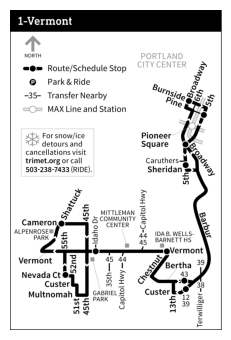

In [30]:
# Check against the actual route map
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

f = "https://trimet.org/schedules/img/001.png"
a = io.imread(f)

plt.imshow(a)
plt.axis('off')

plt.show()